In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/vishurudratrainer/notebooks/main/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
from sklearn.preprocessing import LabelEncoder

In [7]:
col = ['smoker', 'region', 'sex']
le = LabelEncoder()

In [8]:
for c in col:
    df[c] = le.fit_transform(df[c])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: >

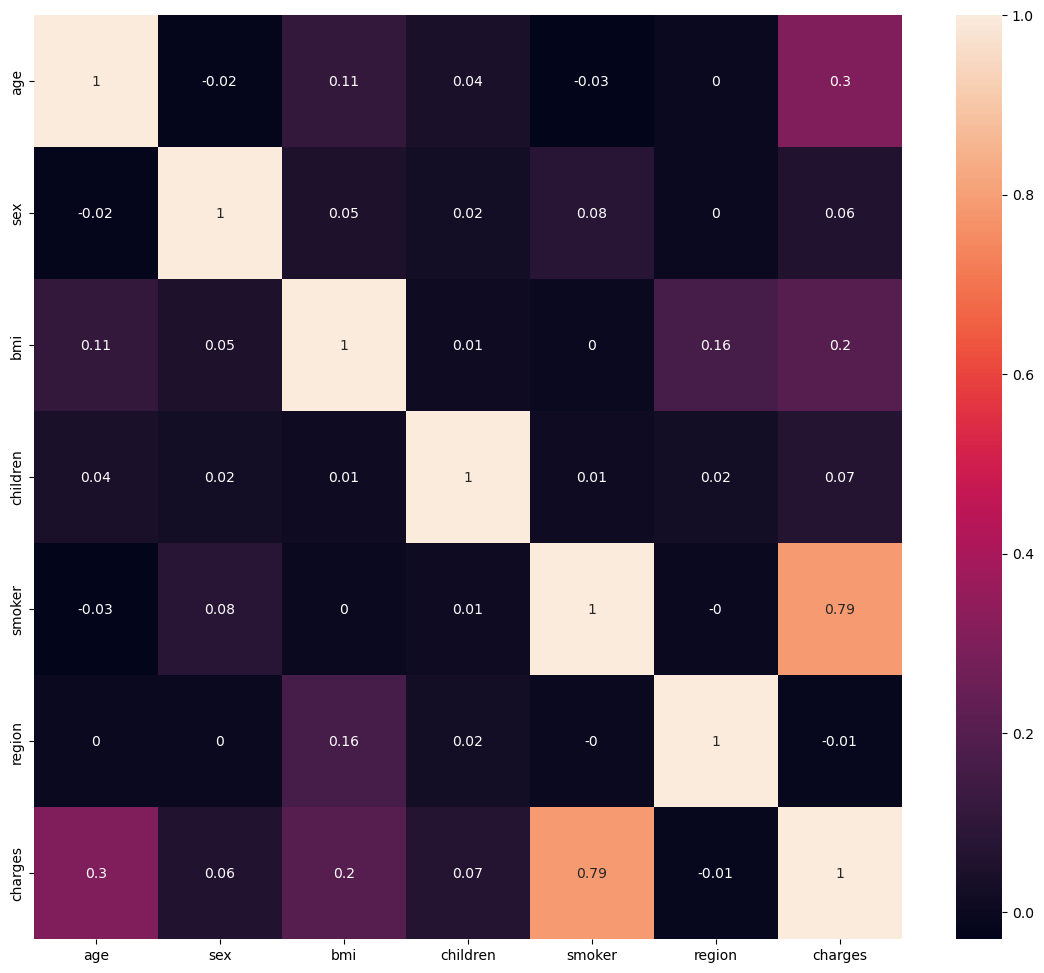

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(14, 12))  
sns.heatmap(data=correlation_matrix, annot=True)

Text(0, 0.5, 'charges')

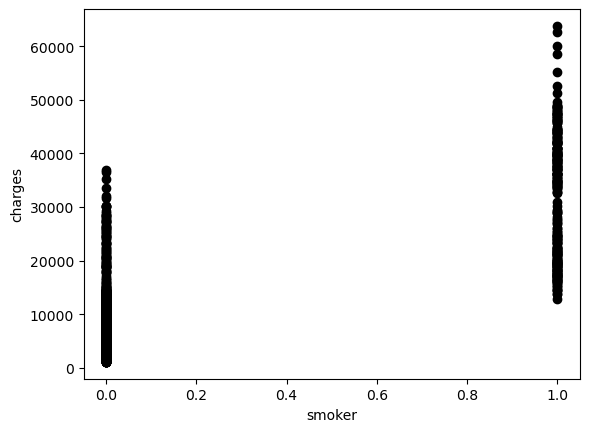

In [15]:
plt.scatter(df['smoker'], df['charges'], color='black')
plt.xlabel('smoker')
plt.ylabel('charges')

In [16]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(df[['smoker']], df['charges'], random_state=0)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)  # Model is generated here
y_pred = lm.predict(X_test)
result = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
result.head()
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred))

53206439.07715559
